In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(0, "../../")
from qtcodes import XZZXQubit
from qiskit import execute, Aer, QuantumCircuit, QuantumRegister

In [3]:
qubit = XZZXQubit()
qubit.reset_z()
qubit.stabilize()
qubit.stabilize()
qubit.x()
qubit.readout_z()

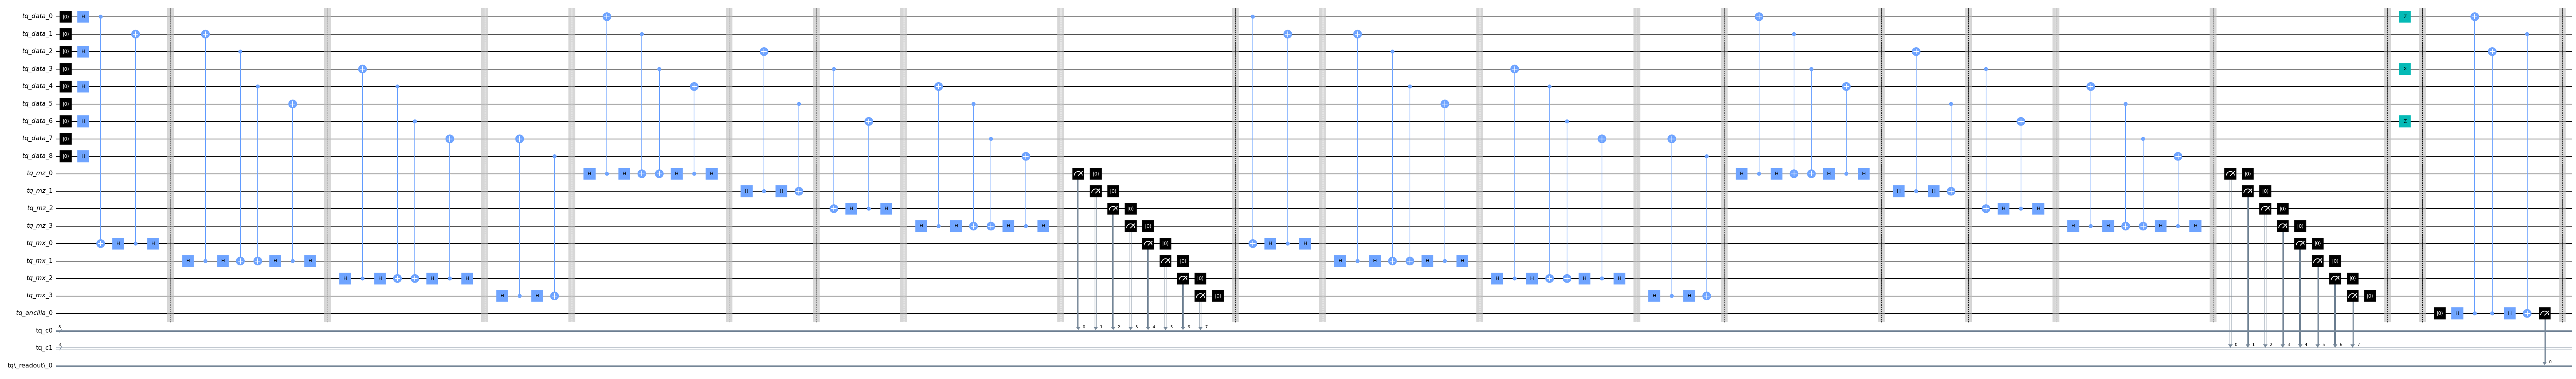

In [4]:
qubit.draw(output='mpl', fold=150)

In [5]:
results = execute(qubit.circ, Aer.get_backend('qasm_simulator'), shots=10000).result().get_counts()
results

{'1 01010000 01010000': 636,
 '1 11000000 11000000': 586,
 '1 00100000 00100000': 633,
 '1 01100000 01100000': 666,
 '1 00010000 00010000': 592,
 '1 01110000 01110000': 630,
 '1 10000000 10000000': 670,
 '1 10110000 10110000': 630,
 '1 00000000 00000000': 593,
 '1 11010000 11010000': 605,
 '1 11100000 11100000': 640,
 '1 00110000 00110000': 623,
 '1 01000000 01000000': 603,
 '1 10010000 10010000': 621,
 '1 10100000 10100000': 618,
 '1 11110000 11110000': 654}

# Lattice Readout

In [6]:
qubit = XZZXQubit({'d':5})
qubit.reset_z()
qubit.stabilize()
qubit.circ.x(0)
qubit.circ.z(0)
qubit.stabilize()
qubit.circ.x(0)
qubit.circ.z(0) #this will not be detected, but that's ok!
qubit.lattice_readout_z()

In [ ]:
results = execute(qubit.circ, Aer.get_backend('qasm_simulator'), shots=1).result().get_counts()
readout_string = list(results.keys())[0]
print("Readout String: ", readout_string.split(" ")[0])
logical_readout, syndromes = qubit.parse_readout(readout_string, "Z")
print("Logical Readout: ", logical_readout)
print("Syndromes: \n", syndromes)